<a href="https://colab.research.google.com/github/Nuthan03/NN_Regression/blob/main/neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression with TensorFlow

There are many definitions for a [regression problem](https://en.wikipedia.org/wiki/Regression_analysis) but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:
- Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
- Predict the coordinates of a bounding box of an item in an image.
- Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.14.0


## Creating data to view and fit

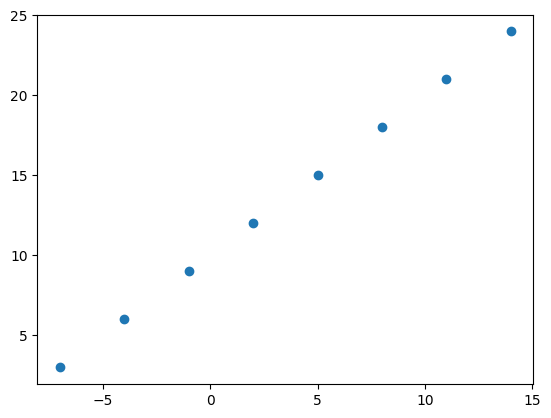

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0 , -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,Y);

In [ ]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shape

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "batroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'batroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
# Turn our numpy arrays into tensors

X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape , output_shape

(TensorShape([]), TensorShape([]))

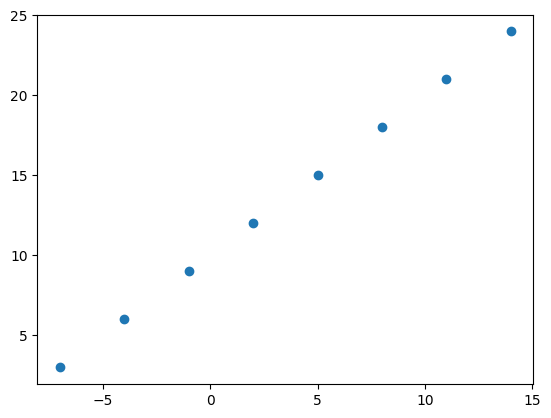

In [ ]:
plt.scatter(X,Y)

## Steps in modelling with TensorFlow

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - Define the input and output layers, as well as the hidden layers of a deep learning model ,piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 7.6948 - mae: 7.6948
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 7.5623 - mae: 7.5623
Epoch 3/5
1/1 [==============================] - 0s 20ms/step - loss: 7.4850 - mae: 7.4850
Epoch 4/5
1/1 [==============================] - 0s 20ms/step - loss: 7.4794 - mae: 7.4794
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 7.4738 - mae: 7.4738


In [ ]:
# Check out X and Y
X , Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
y_preds = model.predict([17.0])
y_preds

1/1 [==============================] - 0s 56ms/step


array([[29.429014]], dtype=float32)

## Improving the model

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).



In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 342ms/step - loss: 9.3427 - mae: 9.3427
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 9.2102 - mae: 9.2102
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 9.0777 - mae: 9.0777
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 8.9452 - mae: 8.9452
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 8.8127 - mae: 8.8127
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 8.6802 - mae: 8.6802
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 8.5477 - mae: 8.5477
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 8.4152 - mae: 8.4152
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2827 - mae: 8.2827
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 8.1502 - mae: 8.1502
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - los

In [ ]:
X , Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 197ms/step


array([[29.905136]], dtype=float32)

In [ ]:
# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 841ms/step - loss: 12.8137 - mae: 12.8137
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.7298 - mae: 12.7298
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.6459 - mae: 12.6459
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 12.5619 - mae: 12.5619
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4778 - mae: 12.4778
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 12.3936 - mae: 12.3936
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 12.3093 - mae: 12.3093
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 12.2249 - mae: 12.2249
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 12.1404 - mae: 12.1404
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 12.0558 - mae: 12.0558
Epoch 11/100
1/1 [==============================

In [ ]:
# Look at the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 353ms/step


array([[27.36424]], dtype=float32)

## Evaluating a model
A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

### Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?


In [ ]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

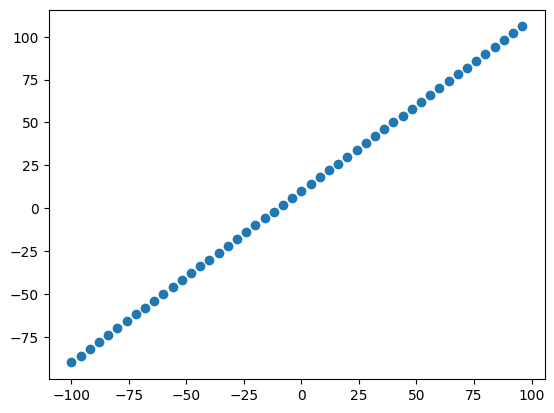

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, Y)

## Split data into training/test set

Each set serves a specific purpose:
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40]
Y_train = Y[:40]

X_test = X[40:]
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our training and test data, it's a good idea to visualize it.

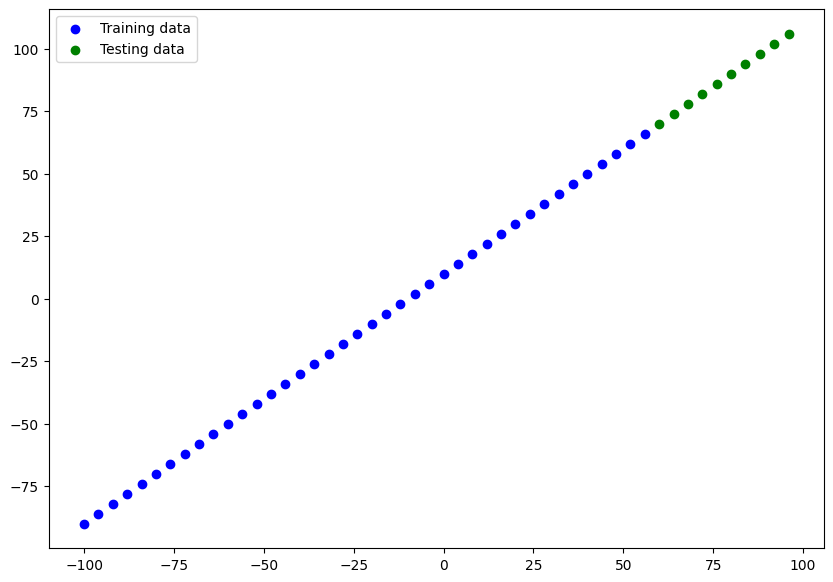

In [ ]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train, Y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, Y_test, c="g", label="Testing data")
# Show the legend
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
#model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

## Visualizing the model

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
# Let's create a model which builds automatically by defining the input_shape
tf.random.set_seed(42)

 # Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
 ], name="model_1")

 # 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during **transfer learning**).

In [ ]:
# Let's fit our model to the training data
model.fit(X_train, Y_train, epochs=100, verbose=0)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


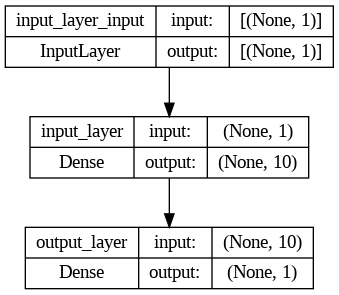

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

## Visualizing the predictions

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` vs. `y_pred` (ground truth vs. predictions).

In [ ]:
# Make some predictions
Y_preds = model.predict(X_test)
Y_preds

1/1 [==============================] - 0s 95ms/step


array([[ 78.37497 ],
       [ 83.48078 ],
       [ 88.586586],
       [ 93.6924  ],
       [ 98.79821 ],
       [103.90402 ],
       [109.00983 ],
       [114.11565 ],
       [119.22145 ],
       [124.32727 ]], dtype=float32)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Lets create a plotting function

def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=Y_preds):

  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

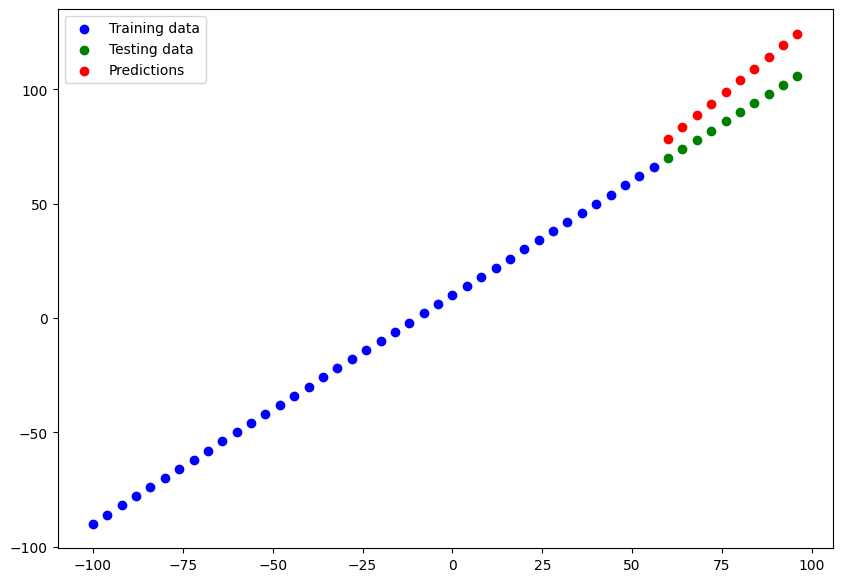

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=Y_train,
                 test_data=X_test,
                 test_labels=Y_test,
                 predictions=Y_preds)